# My First FID
We are going to construct a synthetic FID to showcase some basic concepts on how to create, manipulate, and visualize data with [Numpy](https://numpy.org/) and [Matplotlib](https://matplotlib.org/)

First thing we do is to import the libraries we're going to be using, in this case we're importing `numpy` and will reference to it internally as `np` and the module `pyplot` from `matplotlib` as `plt`

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib can show plots with various backend engines. For now, we want to show the plots inline inside the notebook. For that we can use the following notebook command, which is called a `line magic`.
Later on in the course we'll delve into interactive plots using the [bokeh](https://bokeh.org) plotting library

In [54]:
%matplotlib inline

Next, we define an array that will hold the time scale of the acquisition. For this we use the numpy function [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace).
`linspace` creates a numpy array with given starting and end points evenly spaced for a given number of points.
You can learn more about numpy array objects [here](https://numpy.org/doc/stable/reference/arrays.html)

In [116]:
# aq=8sec, td=8192
t = np.linspace(0.0, 8.0, 8192)

A quick way of visualizing the contents of variables is to print them in the notebook, for that just type the name of the variable in a cell, you cn also use the print function to format the output

In [124]:
t

array([0.00000000e+00, 9.76681724e-04, 1.95336345e-03, ...,
       7.99804664e+00, 7.99902332e+00, 8.00000000e+00])

In [123]:
print('first value: %f\nlast value: %f\nslice from 10 to 20: %s\nmin: %f\nmax: %f\ntotal integral: %f' % (t[0], t[-1], t[10:20], t.min(), t.max(), t.sum()))

first value: 0.000000
last value: 8.000000
slice from 10 to 20: [0.00976682 0.0107435  0.01172018 0.01269686 0.01367354 0.01465023
 0.01562691 0.01660359 0.01758027 0.01855695]
min: 0.000000
max: 8.000000
total integral: 32768.000000


Next we define a function that creates a sigle frequency component based on frequency and relaxation time. We can call this function later on to create a multitude of signals and add them up to create our first FID.

In [97]:
def gen_freq_component(t, frequency=0, rx_time=1, amplitude=1):
    # create initial complex array of zeros the same size as our time scale array
    comp = np.zeros(t.shape[-1], dtype='complex64')
    
    # create real part of FID
    comp.real = np.cos(2*np.pi*frequency*t) * np.exp(-t/rx_time)
    
    # create imaginary parto of FID
    comp.imag = np.sin(2*np.pi*frequency*t) * np.exp(-t/rx_time)
    
    return amplitude * comp

Let's create our first frequency FID component

In [113]:
freq = 4
relt = 2

comp = gen_freq_component(t, frequency=freq, rx_time=relt)
comp

array([1.        +0.0000000e+00j, 0.99921066+2.4532242e-02j,
       0.99782014+4.9025755e-02j, ..., 0.01831145-8.9969370e-04j,
       0.01831906-4.4976274e-04j, 0.01831564-1.4355321e-16j],
      dtype=complex64)

And use matplotlib to create a quick plot if it

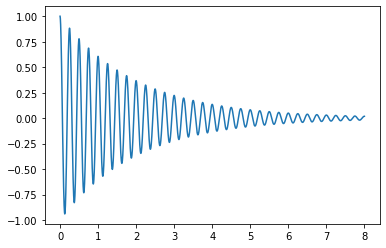

In [114]:
plt.plot(t, comp.real)

Now we are ready to build a synthetic FID by defining some frequency components

In [147]:
freqs = [-310, -130, 50, 250, 260, 270]
rx_times = [0.1, 0.2, 0.5, 2.2, 2.2, 2.2]
amps = [1, 2, 3, 0.33, 1, 0.33]

comps = [gen_freq_component(t, fq, rx, am) for (fq, rx, am) in zip(freqs, rx_times, amps)]

comps

[array([ 1.0000000e+00+0.00000000e+00j, -3.2236597e-01-9.36341882e-01j,
        -7.7281630e-01+6.03689492e-01j, ...,
        -1.4503887e-35-1.13297875e-35j, -5.9329949e-36+1.72329352e-35j,
         1.8048513e-35+0.00000000e+00j], dtype=complex64),
 array([ 2.0000000e+00+0.0000000e+00j,  1.3898095e+00-1.4246236e+00j,
        -4.8991043e-02-1.9799554e+00j, ..., -2.1223684e-19+8.5774758e-18j,
         5.9623526e-18+6.1117071e-18j,  8.4967083e-18+5.0622290e-30j],
       dtype=complex64),
 array([3.0000000e+00+0.0000000e+00j, 2.8543034e+00+9.0435666e-01j,
        2.4430621e+00+1.7208722e+00j, ..., 2.7708700e-07-1.9517772e-07j,
        3.2246686e-07-1.0217032e-07j, 3.3760551e-07+5.3055025e-21j],
       dtype=complex64),
 array([ 3.3000001e-01+0.0000000e+00j,  1.2079261e-02+3.2963228e-01j,
        -3.2882285e-01+2.4131602e-02j, ..., -8.6792167e-03-6.3694903e-04j,
         3.1854684e-04-8.6928606e-03j,  8.6948341e-03-1.1178657e-14j],
       dtype=complex64),
 array([ 1.0000000e+00+0.0000000e+0

Let's look at the lowest frequency component which also as the shortest relaxation time

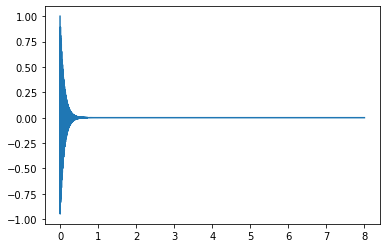

In [148]:
plt.plot(t, comps[0].real)

As we can see, the curve decays very quickly, which is what we expected. 
in constrast if we look at a slow decaying component we should see a nice exponential envelope

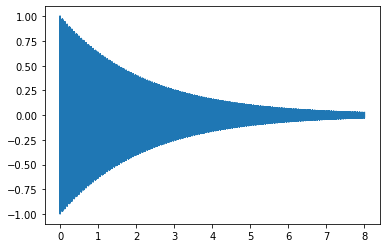

In [149]:
plt.plot(t, comps[4].real)

Now, if we sum up all components, we'll get our first synthetic FID!

In [150]:
fid = np.zeros(len(t), dtype='complex128')
for c in comps:
    fid += c

And to plot it

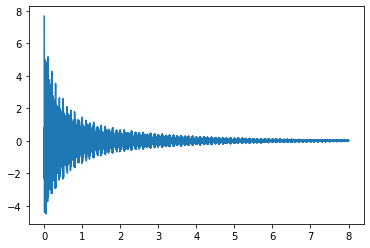

In [151]:
plt.plot(t, fid.real)

Such nice piece of data deserves to be saved, that way we can load it up on following chapters. We can do that directly from numpy by using the `savetxt` function, which will save the data in csv format. Throughout the course we'll be saving results in the output directory.

In [152]:
with open('output/my_first_fid.csv', 'w') as fout:
    np.savetxt(fout, fid, delimiter=',')

### This is the end, my only friend, the end ...
(from The Doors, just in case you didn't get the quote ;))

And just like that we have arrived to the end of this chapter, next up is how to get nicer plots.
You can now

go [next](02_nicer_plotting.ipynb) or go [home](00_introduction.ipynb), there's no going [back](00_introduction.ipynb)